In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from collections import defaultdict
from cemba_data.tools.integration.utilities import calculate_direct_confusion
from ALLCools.plot import *
from ALLCools.plot.color import plot_colorbar
import xarray as xr

In [2]:
from matplotlib import rc

labelsize = 6
linewidth = 0.6
rc('lines', linewidth=linewidth)
rc('axes', labelsize=labelsize, linewidth=linewidth)
rc('xtick', labelsize=labelsize)
rc('ytick', labelsize=labelsize)
rc('xtick.major', width=linewidth)
rc('ytick.major', width=linewidth)
rc('xtick.minor', width=linewidth-0.2)
rc('ytick.minor', width=linewidth-0.2)
rc('patch', linewidth=linewidth)

## Cell Meta

In [4]:
cell_tidy_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg'
)

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/dissection_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

cell_class_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/cell_class.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

for sub_type in cell_tidy_data['SubType'].unique():
    if sub_type not in sub_type_palette:
        # outlier and NA color
        sub_type_palette[sub_type] = '#D3D3D3'

## Integration result

In [7]:
mc_integration_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/IntegrationWithATAC/HPF-Exc/Integration/mc_cell_tidy_data.with_integration_info.msg'
)

atac_integration_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/IntegrationWithATAC/HPF-Exc/Integration/atac_cell_tidy_data.with_integration_info.msg'
)

In [8]:
atac_tidy_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/ATAC/Metadata/ATAC.cell_tidy_data.v2.msg')
atac_sub_type_palette = atac_tidy_data.groupby('SubType')['L3Color'].apply(lambda i: i[0]).to_dict()

## mC

In [12]:
atac_integration_data.columns

Index(['Modality', 'leiden', 'umap_0', 'umap_1', 'pca_0', 'pca_1', 'tsne_0',
       'tsne_1', 'SubType', 'co_cluster'],
      dtype='object')

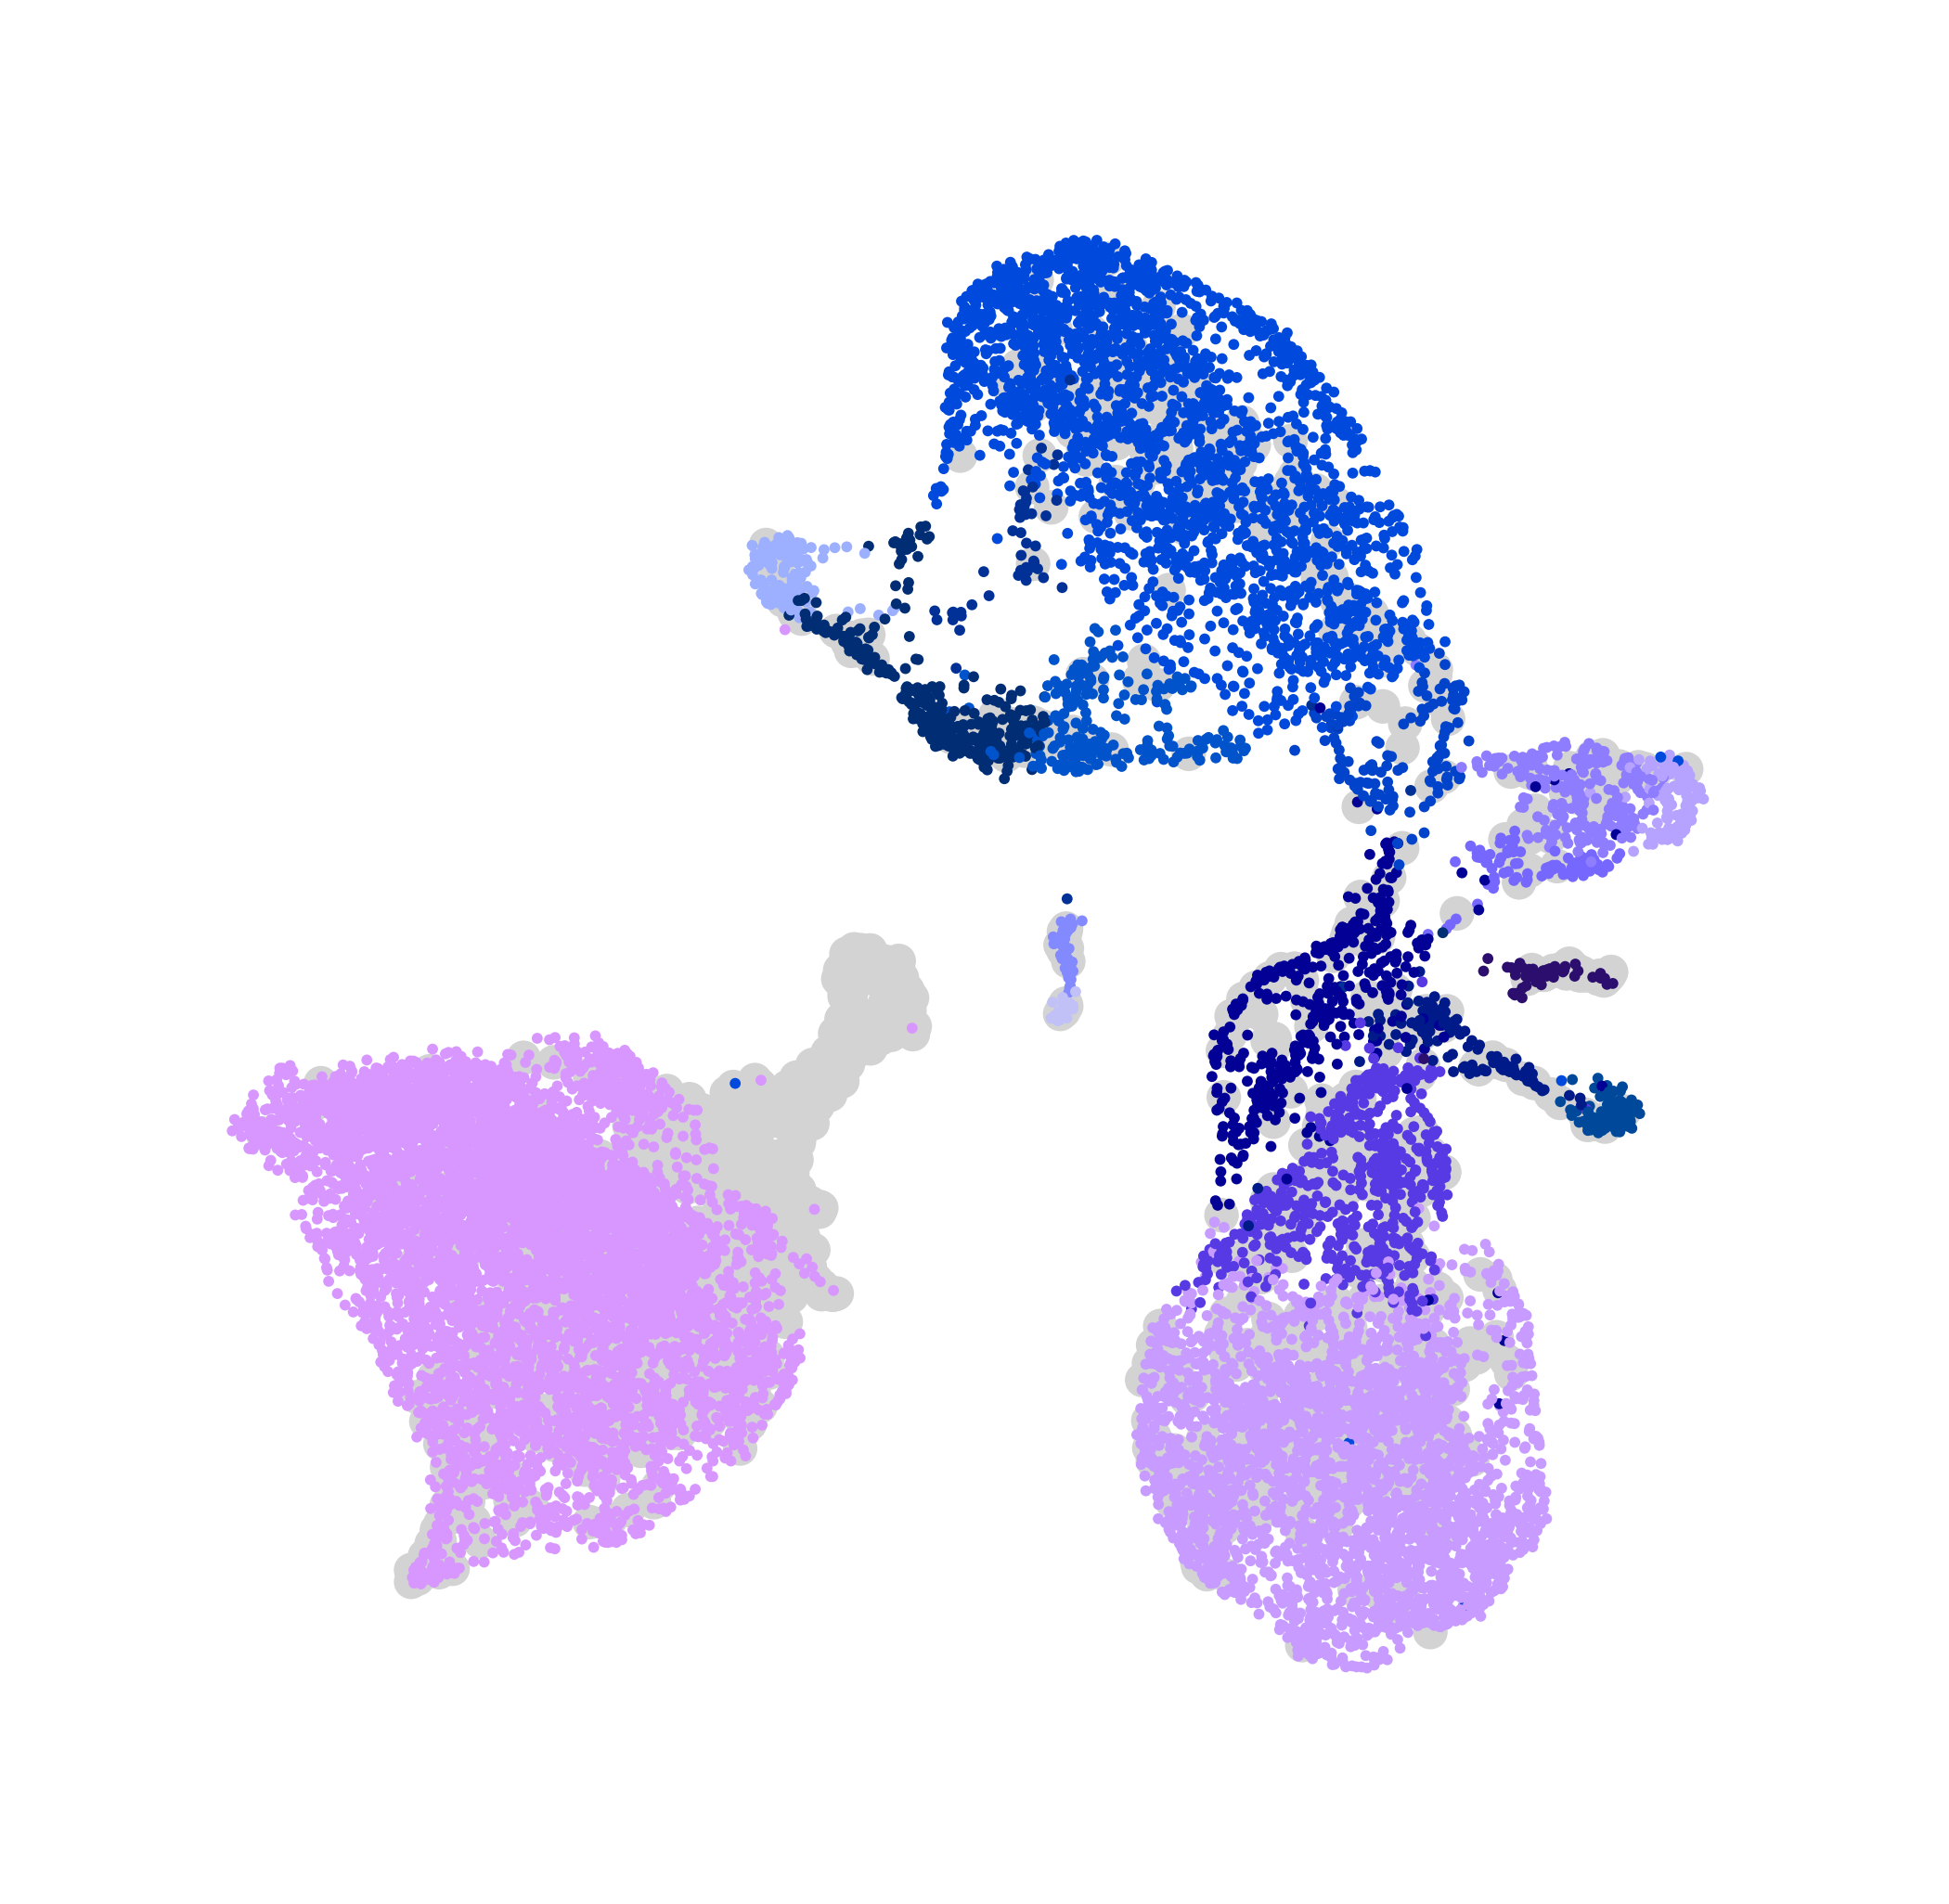

In [27]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=1200)

categorical_scatter(ax=ax,
                    data=atac_integration_data,
                    coord_base='umap',
                    s=5,
                    axis_format=None,
                    max_points=None,
                    scatter_kws=dict(color='lightgray'),
                    #text_anno='SubType', 
                    text_anno_kws=dict(fontsize=2))

categorical_scatter(ax=ax,
                    data=mc_integration_data,
                    coord_base='aggumap',
                    hue='SubType',
                    palette=sub_type_palette,
                    s=0.5,
                    axis_format=None,
                    max_points=None,
                    #text_anno='SubType', 
                    text_anno_kws=dict(fontsize=2))


#add_ax_box(ax, linewidth=0.5)
fig.savefig('UMAP-Integration.mC.color_by_subtype.scatter_part.png')
pass

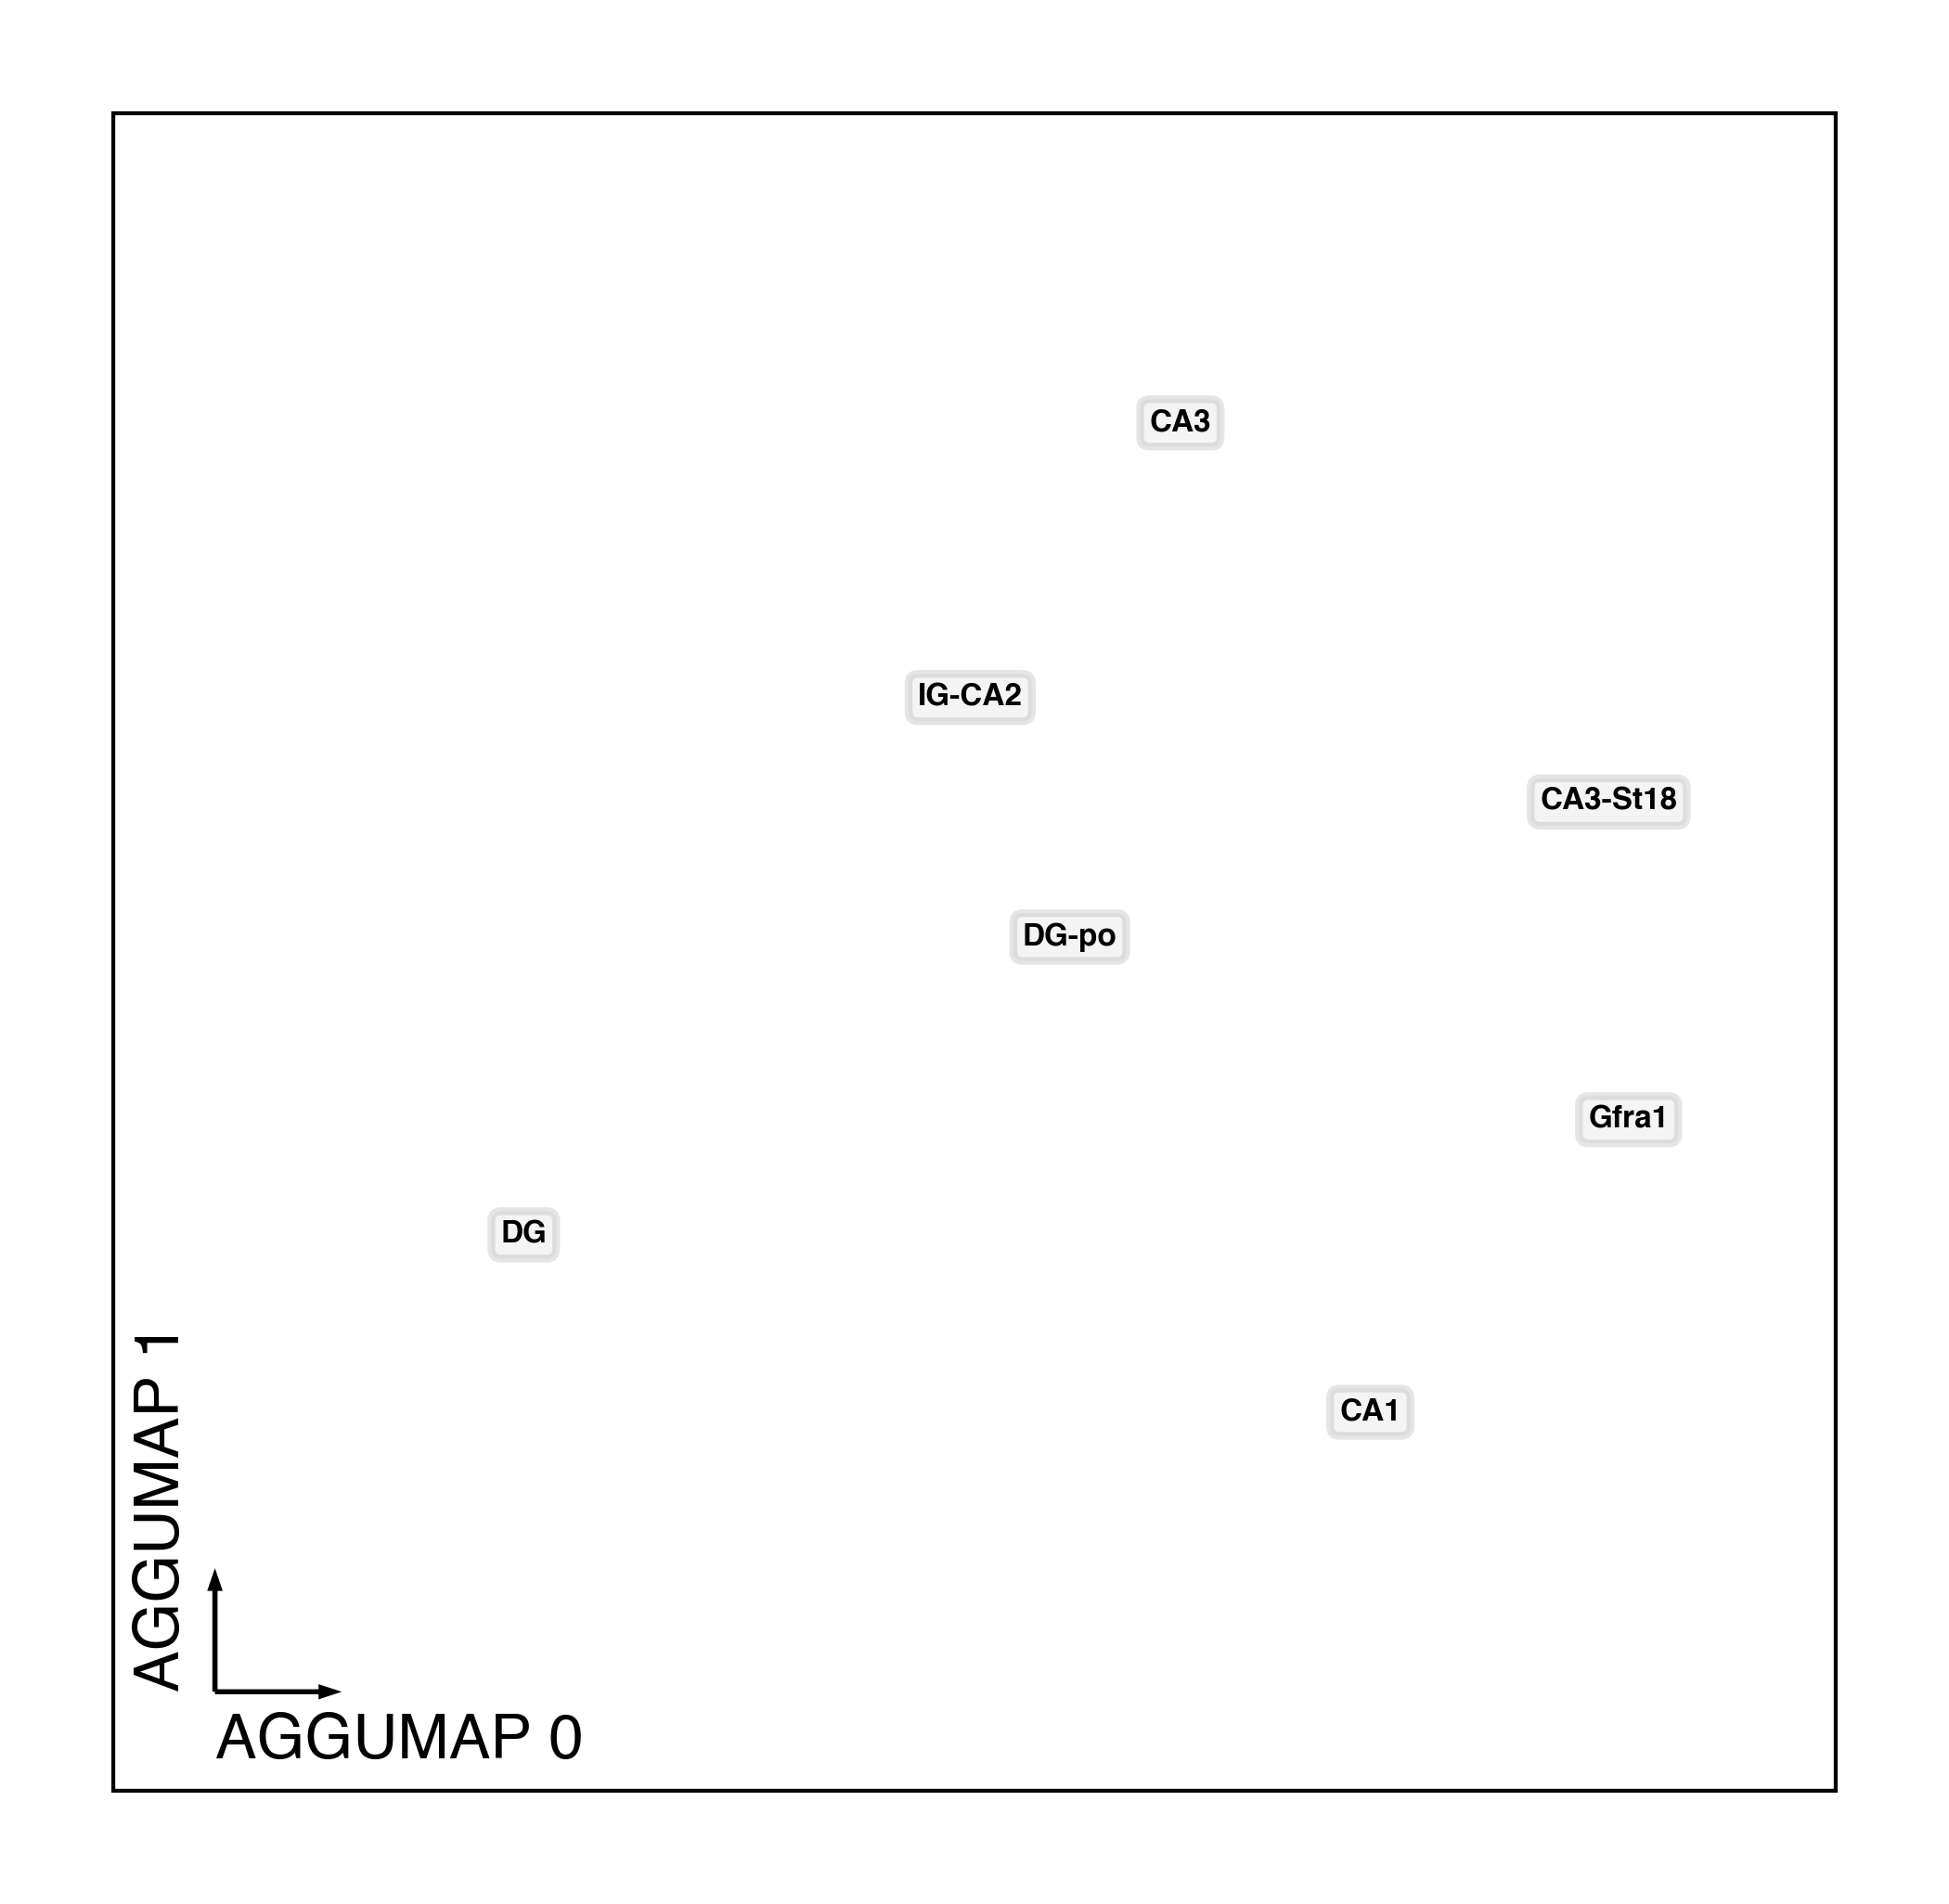

In [26]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=1200)

categorical_scatter(ax=ax,
                    data=mc_integration_data,
                    coord_base='aggumap',
                    s=0.8,
                    # axis_format=None,
                    max_points=None,
                    text_anno='MajorType', 
                    text_anno_kws=dict(fontsize=2))

add_ax_box(ax, linewidth=0.5)
ax.collections[0].remove()
fig.savefig('UMAP-Inh-Integration.mC.color_by_subtype.label_part.pdf')
pass

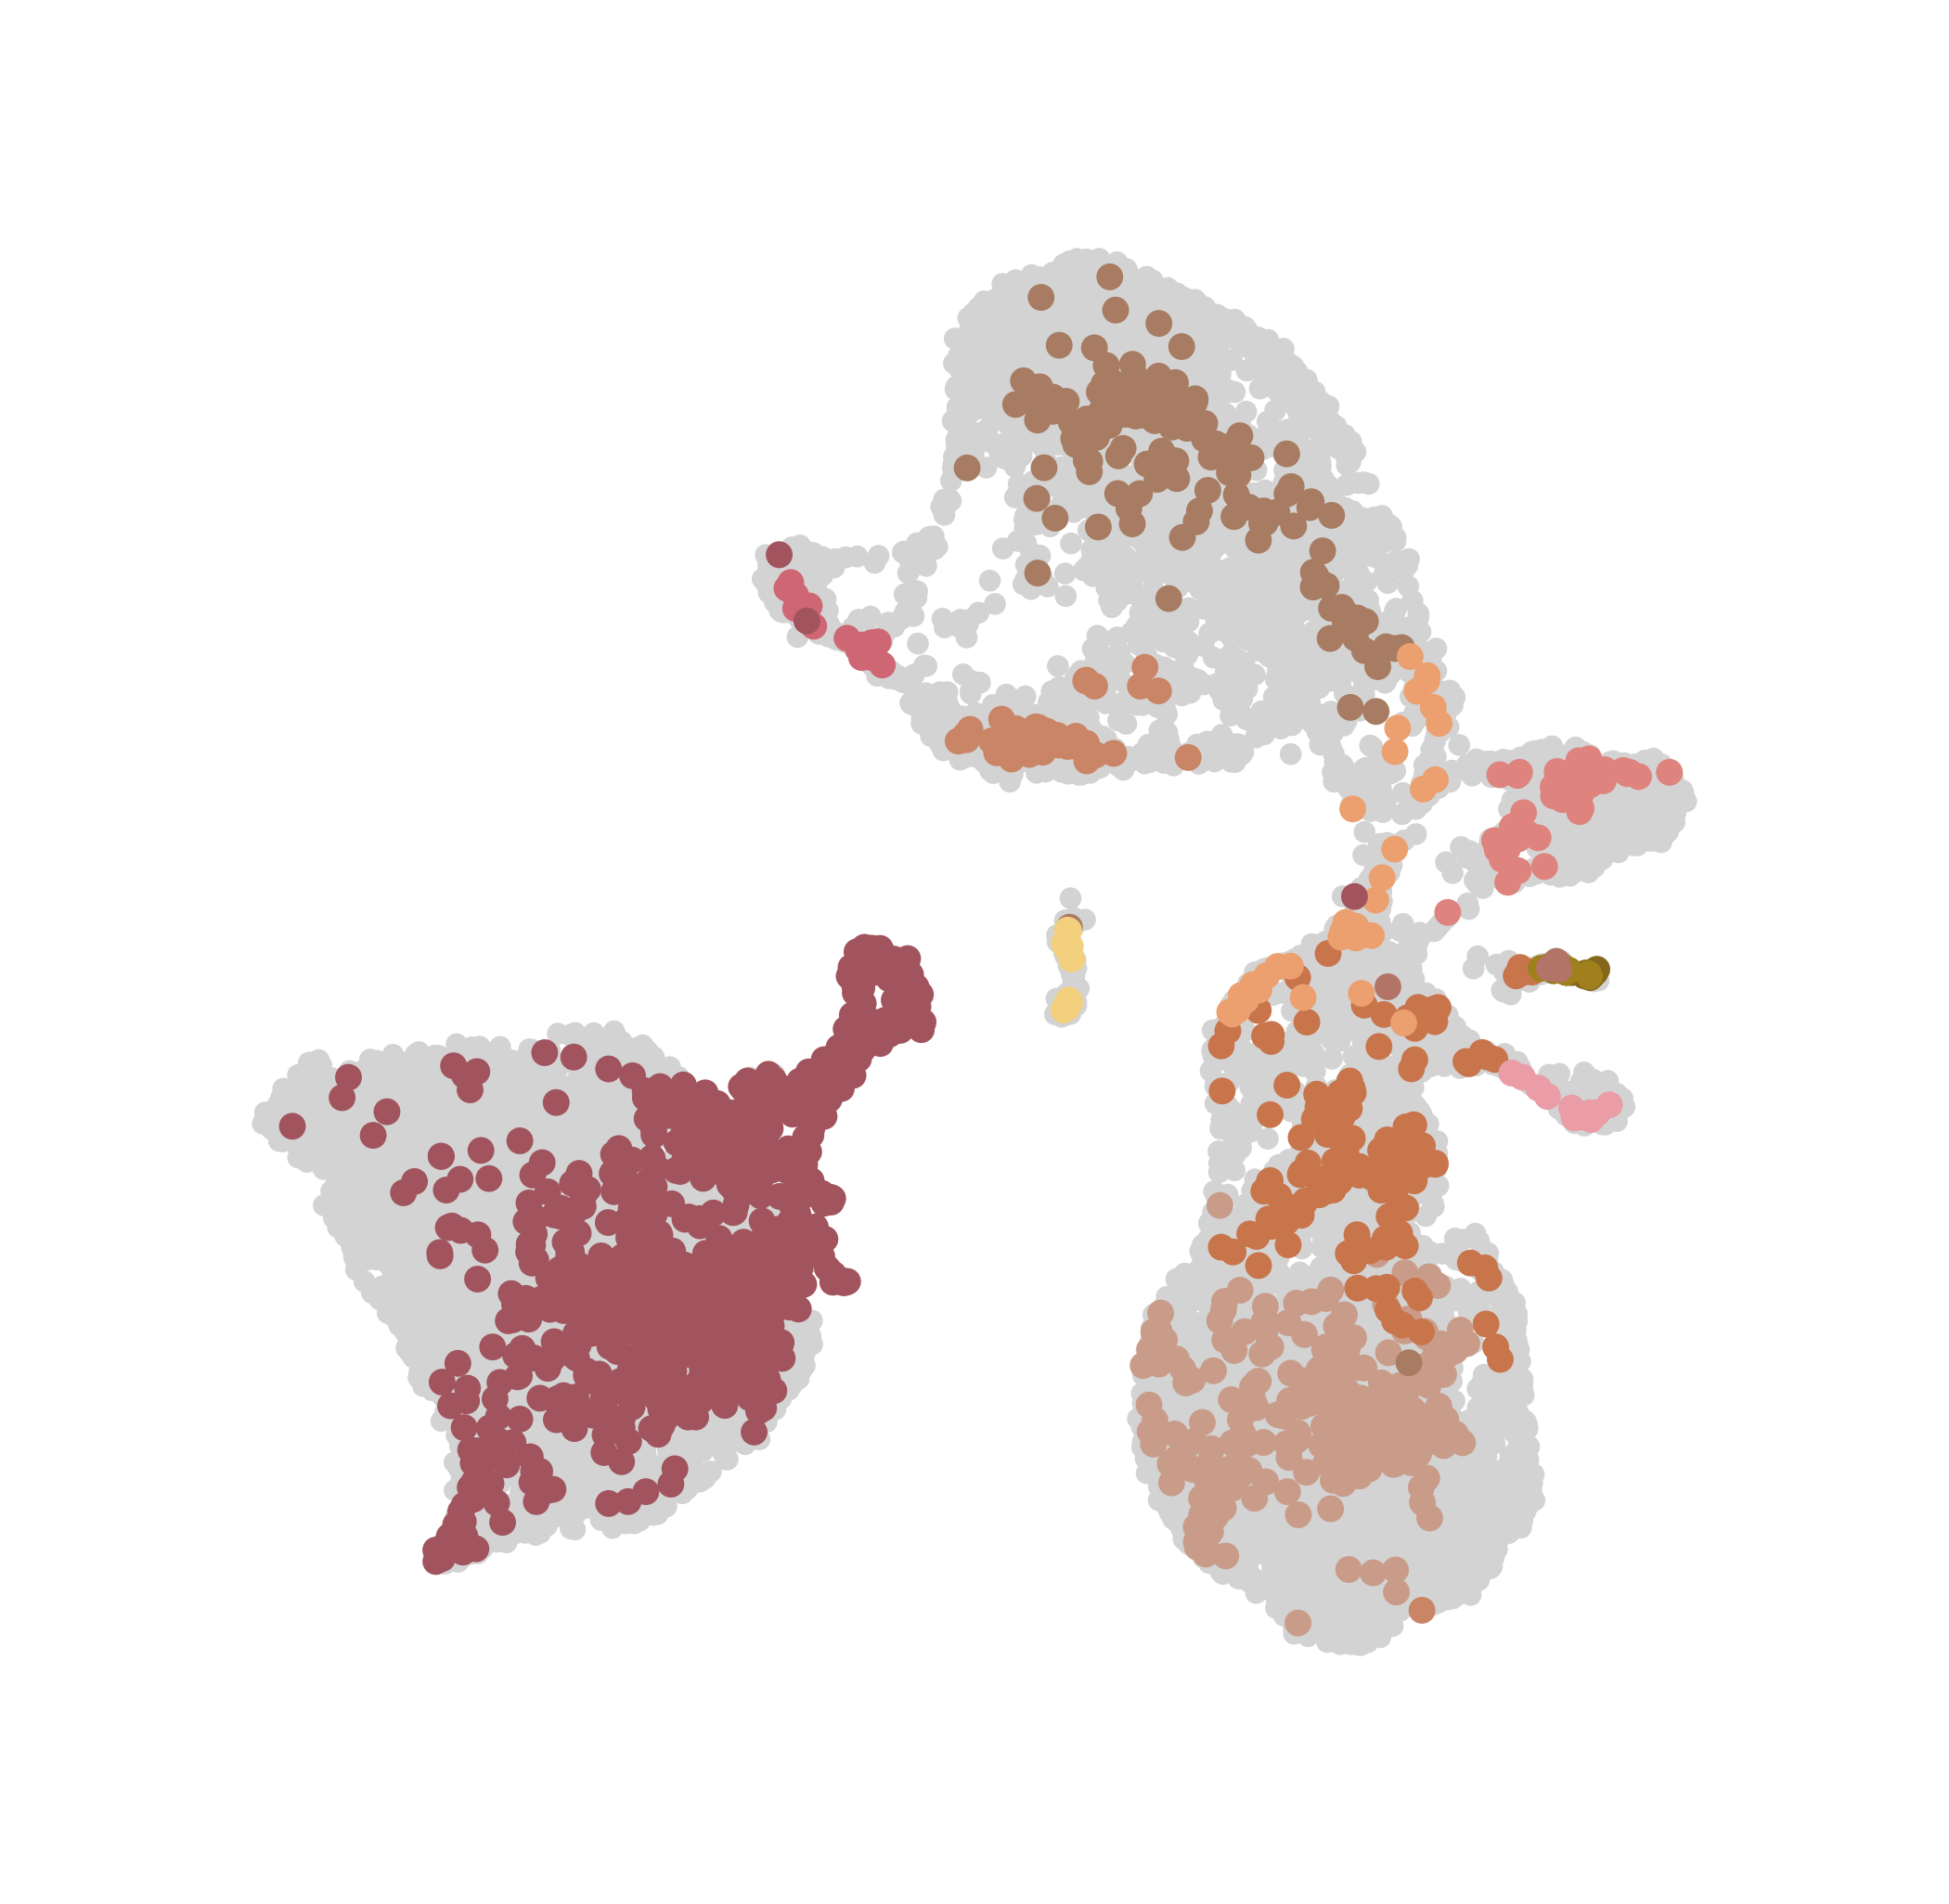

In [25]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=1200)

categorical_scatter(ax=ax,
                    data=mc_integration_data,
                    coord_base='aggumap',
                    s=2,
                    axis_format=None,
                    max_points=None,
                    scatter_kws=dict(color='lightgray'),
                    #text_anno='SubType', 
                    text_anno_kws=dict(fontsize=2))

categorical_scatter(ax=ax,
                    data=atac_integration_data,
                    coord_base='umap',
                    hue='SubType',
                    palette=atac_sub_type_palette,
                    s=3,
                    axis_format=None,
                    max_points=None,
                    #text_anno='SubType', 
                    text_anno_kws=dict(fontsize=2))

#add_ax_box(ax, linewidth=0.5)
fig.savefig('UMAP-Integration.ATAC.color_by_subtype.scatter_part.png')
pass

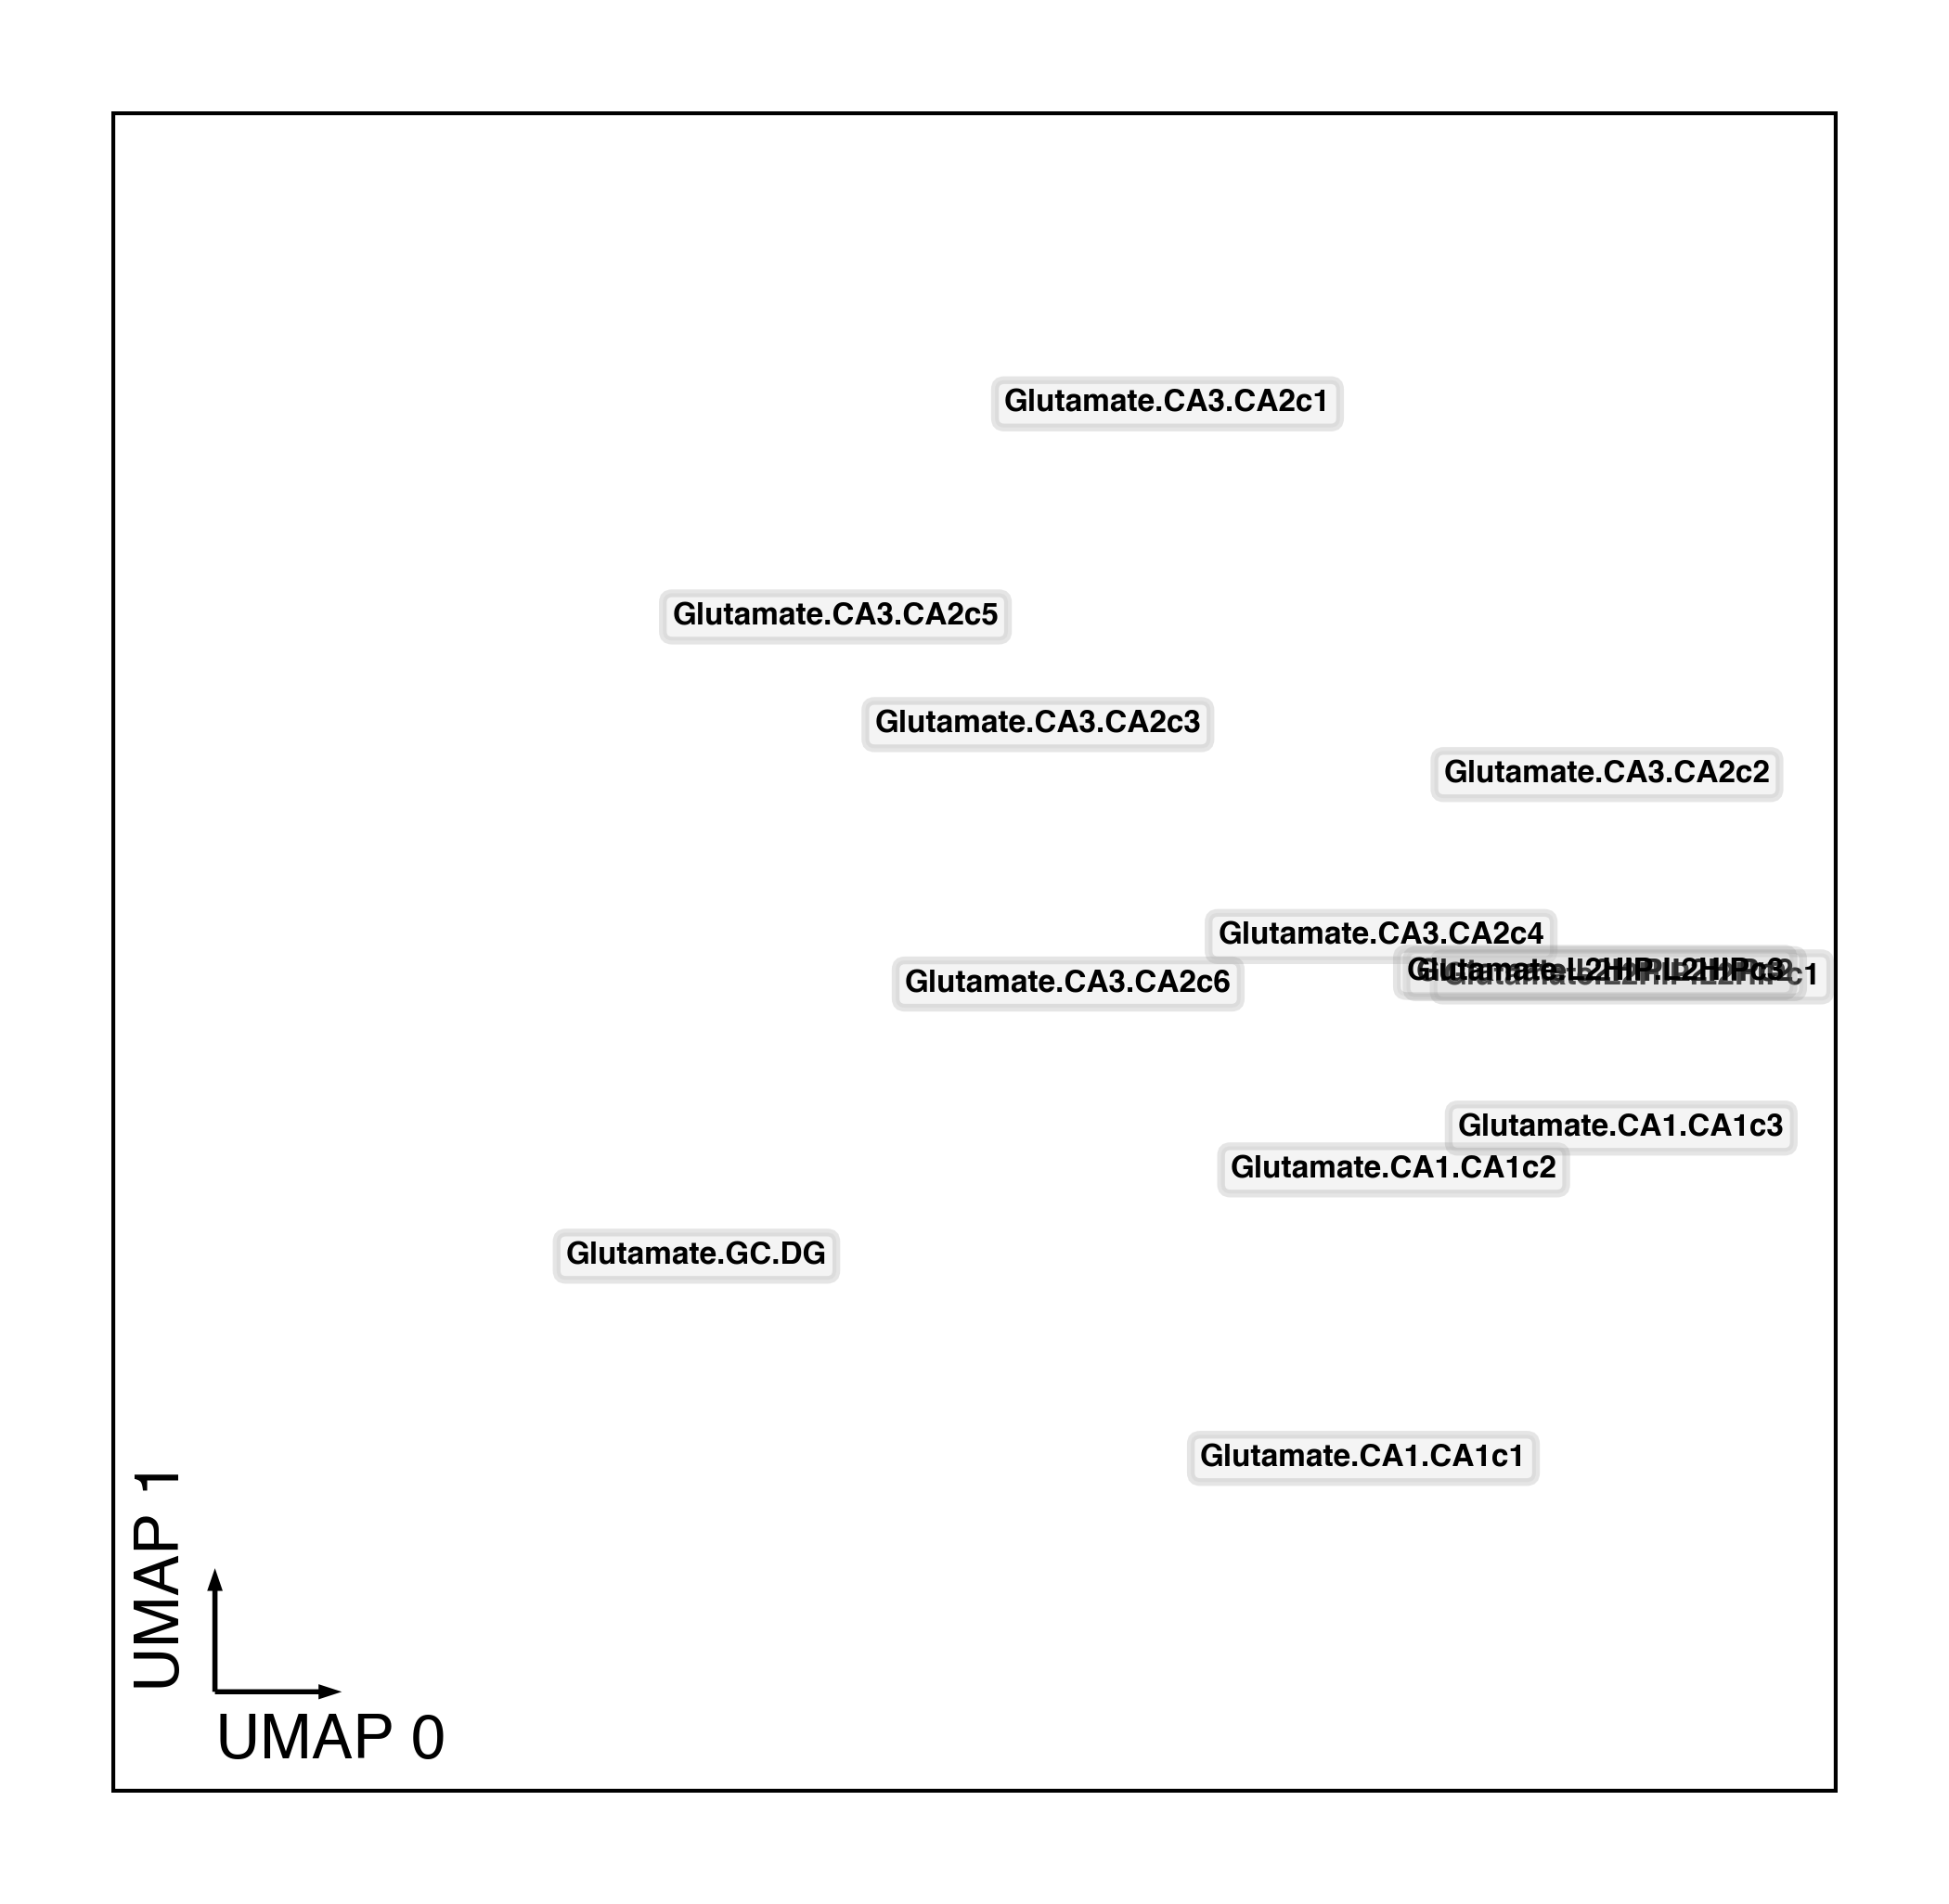

In [24]:
fig, ax = plt.subplots(figsize=(2, 2), dpi=1200)

categorical_scatter(ax=ax,
                    data=atac_integration_data,
                    coord_base='umap',
                    s=0.8,
                    # axis_format=None,
                    max_points=None,
                    text_anno='SubType', 
                    text_anno_kws=dict(fontsize=2))

add_ax_box(ax, linewidth=0.5)
ax.collections[0].remove()
# fig.savefig('TSNE-Inh-Integration.ATAC.color_by_subtype.label_part.pdf')
pass